In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
# Repository
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/dataset_word_only/test_proccess',
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

# Load TFLite model
interpreter = tf.lite.Interpreter(model_path='model_word_metadata.tflite')
interpreter.allocate_tensors()

# Dapatkan input dan output tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

def predict_tflite(image):
    # Konversi tensor ke numpy array yang bisa dimodifikasi
    image = image.numpy().copy()

    # Pra-pemrosesan gambar
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
    image = np.expand_dims(image, axis=0)

    # Set input tensor
    interpreter.set_tensor(input_details[0]['index'], image)

    # Jalankan inferensi
    interpreter.invoke()

    # Dapatkan output
    output = interpreter.get_tensor(output_details[0]['index'])
    return output[0]  # Ambil array prediksi saja, buang dimensi batch

# Evaluasi model
predictions = []
true_labels = []

for images, labels in test_dataset:
    for image, label in zip(images, labels):
        pred = predict_tflite(image)
        predictions.append(pred)
        true_labels.append(label.numpy())  # Konversi label tensor ke numpy array

# Konversi list ke numpy array
predictions = np.array(predictions)
true_labels = np.array(true_labels)

# Hitung akurasi
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(true_labels, axis=1))
print(f"Akurasi: {accuracy * 100:.2f}%")

Found 289 files belonging to 26 classes.
Akurasi: 59.52%


Input details:
Shape yang diharapkan: [  1 224 224   3]
Tipe data yang diharapkan: <class 'numpy.float32'>

Raw predictions sebelum softmax:
[2.5387797e-07 9.9962127e-01 1.2469556e-07 1.9042285e-06 7.0740064e-08
 3.5872986e-08 2.0822559e-07 2.4762814e-04 9.0304877e-07 4.1020087e-08
 1.0376547e-08 7.6720435e-06 2.3508678e-08 1.8500198e-07 3.8241245e-07
 5.3510854e-07 1.0659813e-04 1.3262333e-09 4.5762035e-06 2.6731407e-06
 9.6246362e-09 1.1549376e-06 1.7799157e-07 1.0717920e-09 3.2104524e-06
 3.1718051e-07]

Nilai prediksi setelah softmax:
baca: 0.0361
bantu: 0.0980
bapak: 0.0361
buangairkecil: 0.0361
buat: 0.0361
halo: 0.0361
ibu: 0.0361
kamu: 0.0361
maaf: 0.0361
makan: 0.0361
mau: 0.0361
nama: 0.0361
pagi: 0.0361
paham: 0.0361
sakit: 0.0361
sama-sama: 0.0361
saya: 0.0361
selamat: 0.0361
siapa: 0.0361
tanya: 0.0361
tempat: 0.0361
terima kasih: 0.0361
terlambat: 0.0361
tidak: 0.0361
tolong: 0.0361
tugas: 0.0361


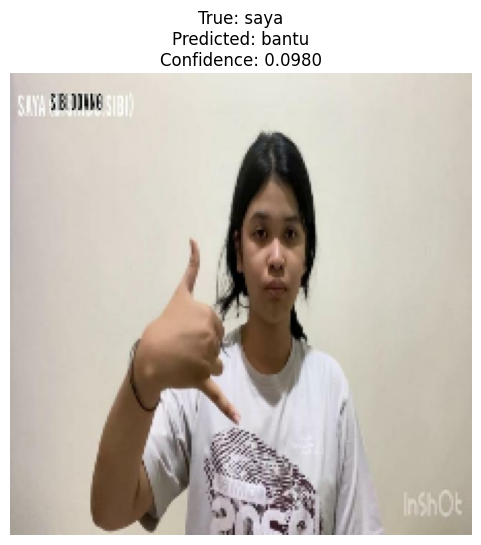

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random # Import the random module

class_names = test_dataset.class_names
def predict_and_display_random(dataset, interpreter, class_names, num_images=1):
    # Ambil batch random dari dataset
    for images, labels in dataset.take(1):
        idx = random.randint(0, len(images)-1)
        image = images[idx]
        true_label = class_names[np.argmax(labels[idx])]

        # Lakukan prediksi
        img_array = image.numpy().copy()

        # Normalisasi gambar ke range [0,1]
        img_preprocessed = img_array / 255.0

        # Expand dimensions
        img_preprocessed = np.expand_dims(img_preprocessed, axis=0)

        # Set input tensor
        input_details = interpreter.get_input_details()
        output_details = interpreter.get_output_details()

        # Print info tentang input yang diharapkan
        print("Input details:")
        print(f"Shape yang diharapkan: {input_details[0]['shape']}")
        print(f"Tipe data yang diharapkan: {input_details[0]['dtype']}")

        # Konversi ke tipe data yang sesuai
        input_dtype = input_details[0]['dtype']
        img_preprocessed = img_preprocessed.astype(input_dtype)

        interpreter.set_tensor(input_details[0]['index'], img_preprocessed)
        interpreter.invoke()

        # Dapatkan prediksi
        predictions = interpreter.get_tensor(output_details[0]['index'])[0]

        # Print raw predictions
        print("\nRaw predictions sebelum softmax:")
        print(predictions)

        # Terapkan softmax
        predictions = tf.nn.softmax(predictions).numpy()

        print("\nNilai prediksi setelah softmax:")
        for idx, (class_name, pred) in enumerate(zip(class_names, predictions)):
            print(f"{class_name}: {pred:.4f}")

        predicted_class_idx = np.argmax(predictions)
        confidence = predictions[predicted_class_idx]
        predicted_class = class_names[predicted_class_idx]

        # Tampilkan gambar dan prediksi
        plt.figure(figsize=(6, 6))
        plt.imshow(image.numpy().astype("uint8"))
        plt.title(f'True: {true_label}\nPredicted: {predicted_class}\nConfidence: {confidence:.4f}')
        plt.axis('off')
        plt.show()

# Jalankan fungsi
predict_and_display_random(test_dataset, interpreter, class_names)